# Comparaison tri par sélection / tri ABR

Nous allons comparer le tri par ABR avec un tri lent vu l'année dernière : le tri par selection, dont voici le principe :

## Tri par selection


- on considère une liste `lst` de longueur n;
- on trouve l'indice du min de `lst`, on l'échange avec `lst[0]`;
- on recommence avec `lst[1:]` dont on trouve l'indice du min, que l'on échange avec `lst[1]`;
- et ainsi de suite jusqu'à `lst[n-2:]`.


![img](img/sel.gif)

Programme ici la fonction `indice_minimum` qui
- en entrée prend une liste `lst` et un entier `i `qui est un indice de cette liste;
- renvoie l’indice du plus petit élément de la liste situé à partir de l’indice `i`.

Par exemple `indice_minimum([1,4,7,2,5,8],2)` renverra 3 


In [12]:
def indice_minimum(lst : list, i : int) -> int:
    n = len(lst)
    mini = lst[i]
    i_mini = i
    for j in range(i,n):
        if lst[j] < mini:
            mini = lst[j]
            i_mini = j
    return i_mini

Exécuter la cellule de test suivante pour vérifier qu'il n'y a pas d'erreur de syntaxe (rien ne doit s'afficher)

In [13]:
indice_minimum([1,2,3,1,5,6],2)

3

Exécute maintenant cette cellule de test pour vérifier que ta fonction est correcte.

In [14]:
try:
    assert indice_minimum([1,2,4,65,5,4,8],1)==1
    assert indice_minimum([1,2,4,65,5,4,8],5)==5
except:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Tout est OK, tu peux continuer.


Tu peux maintenant programmer la fonction suivante en Python

```
fonction tri_selection(lst)
    n = longueur(lst)
    pour i allant de 0 à n - 2
        p = indice_minimum(lst,i)
        échanger lst[p] et lst[i]
```

In [15]:
def tri_selection(lst):
    n = len(lst)
    for i in range(0,n-1):
        p = indice_minimum(lst,i)
        lst[i],lst[p]=lst[p],lst[i]

Exécute la cellule suivante pour dépister les éventuelles erreurs de syntaxe.

In [16]:
tri_selection([3,2,1])

Exécuter la cellule de test suivante pour vérifier.

In [22]:
from random import randint
L1 = [randint(0,100) for _ in range(10)]
print('Je choisis la liste \t\t',L1)
L2 = L1[:]
L2.sort()
print('En la triant on doit obtenir\t',L2)
tri_selection(L1)
print('Avec ta fonction on obtient\t',L1)
t = False
for (x,y) in zip(L1,L2):
    if x !=y:
        t = True
if t:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Je choisis la liste 		 [83, 49, 8, 67, 15, 81, 46, 58, 98, 80]
En la triant on doit obtenir	 [8, 15, 46, 49, 58, 67, 80, 81, 83, 98]
Avec ta fonction on obtient	 [8, 15, 46, 49, 58, 67, 80, 81, 83, 98]
Tout est OK, tu peux continuer.


## Complexité

tu vas maintenant rajouter une variable globale `opel` dans les 2 fonctions précédentes, que tu vas recopier ci dessous.
Tu l'augmenteras de 1 à chaque accès à `lst` en lecture/écriture (pas pour `len`).

**Ce que tu vas mesurer, c'est le nombre *réel* d'opels qui sont exécutées lors du tri d'une liste par sélection, pas le nombre dans le pire des cas.**

Commençons par la fonction `indice_minimum`

In [18]:
nb_opel = 0 #on définit la variable
def indice_minimum(lst : list, i : int) -> int:
    global nb_opel
    n = len(lst)
    mini = lst[i]
    nb_opel+=1
    i_mini = i
    for j in range(i,n):
        nb_opel +=1
        if lst[j] < mini:
            mini = lst[j]
            nb_opel+=1
            i_mini = j
    return i_mini


Exécuter la cellule de test suivante pour vérifier.

In [19]:
try:
    nb_opel = 0
    indice_minimum([2,3,8,4,8,484,5,621,45],0)
    assert nb_opel == 10
except:
        print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Tout est OK, tu peux continuer.


On passe la la fonction `tri_selection`

In [32]:
def tri_selection(lst):
    global nb_opel
    n = len(lst)
    for i in range(0,n-1):
        p = indice_minimum(lst,i)
        nb_opel += 2
        lst[i],lst[p]=lst[p],lst[i]

Et on exécute la cellule de test.

In [33]:
try:
    nb_opel = 0
    tri_selection([2,3,8,4,8,484,5,621,45])
    print(nb_opel)
    assert nb_opel == 73
except:
        print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

73
Tout est OK, tu peux continuer.


Le graphique suivant montre le nombre d'opel nécessaires (en ordonnée) pour trier un tableau d'une taille donnée (en abscisse).

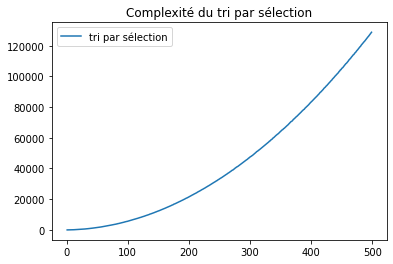

In [34]:
import matplotlib.pyplot as plt
from random import shuffle
X = []
Y = []

for i in range(1,500):
    L = [_ for _ in range(i)]
    shuffle(L)

    
    X.append(i)
    nb_opel = 0
    tri_selection(L)
    Y.append(nb_opel)
    
plt.plot(X,Y,label = "tri par sélection")


plt.title("Complexité du tri par sélection")
plt.legend()
plt.show()

# Un ABR pour trier

On va reprendre la classe `NodeBST` de la feuille d'exercices.
Tu vas devoir y ajouter :
- une variable de classe `opel` de type `int` valantr zéro;
- une méthode de classe `reset` pour remettre `opel` à zéro;
- une augmentation de 1 de `opel` dans les méthodes `infix` et `add_value` :
    - à chaque accès à un fils droit ou fils gauche;
    - à chaque création d'un nouveau noeud;


In [35]:
class NodeBST:
    opel = 0

    @classmethod
    def reset(cls):
        cls.opel = 0

    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left  # left child
        self.right = right  # right child


    def infix(self) -> list:
        result = []
        NodeBST.opel +=1
        if self.left:
            NodeBST.opel += 1
            result.extend(self.left.infix())
        NodeBST.opel += 1
        result.append(self.value)
        NodeBST.opel += 1
        if self.right:
            NodeBST.opel += 1
            result.extend(self.right.infix())
        return result


    def add_value(self, item):
        NodeBST.opel += 1
        if item < self.value:
            NodeBST.opel += 1
            if self.left:
                self.left.add_value(item)
            else:
                NodeBST.opel += 1
                self.left = NodeBST(item)
        elif self.right:
            NodeBST.opel += 1
            self.right.add_value(item)
        else:
            NodeBST.opel += 1
            self.right = NodeBST(item)

Tu vas maintenant créer la fonction `tri_ABR` qui
- en entrée prend une liste d'entiers;
- construit un ABR avec ces entiers en créant une racine avec le premier et en ajoutant les autres un par un;
- renvoie le parcours infixe de l'ABR qui est la liste triée.

In [36]:
def tri_ABR(lst:list)->list:
    root = NodeBST(lst[0])
    for j in range(1,len(lst)):
        root.add_value(lst[j])
    return root.infix()


Exécute la cellule suivante.

In [39]:
L1 = [randint(0,100) for _ in range(10)]
print('Je choisis la liste \t\t',L1)
L2 = L1[:]
L2.sort()
print('En la triant on doit obtenir\t',L2)
L1 = tri_ABR(L1)
print('Avec ta fonction on obtient\t',L1)
t = False
for (x,y) in zip(L1,L2):
    if x !=y:
        t = True
if t:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Je choisis la liste 		 [4, 51, 85, 15, 34, 29, 42, 48, 80, 17]
En la triant on doit obtenir	 [4, 15, 17, 29, 34, 42, 48, 51, 80, 85]
Avec ta fonction on obtient	 [4, 15, 17, 29, 34, 42, 48, 51, 80, 85]
Tout est OK, tu peux continuer.


Exécute la cellule suivante pour comparer les complexités du tri avec ABR avec le tri par sélection.

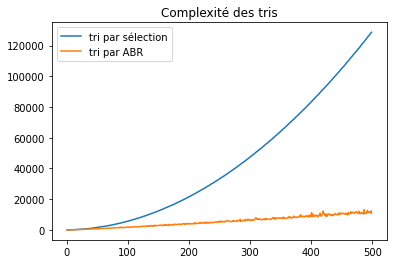

In [40]:
import matplotlib.pyplot as plt
from random import shuffle
X = []
Y = []
Z = []
for i in range(1,500):
    L = [_ for _ in range(i)]
    shuffle(L)
    L2 = L[:]
    
    X.append(i)
    nb_opel = 0
    tri_selection(L)
    Y.append(nb_opel)
    NodeBST.reset()
    tri_ABR(L2)
    Z.append(NodeBST.opel)
    
plt.plot(X,Y,label = "tri par sélection")
plt.plot(X,Z,label = "tri par ABR")

plt.title("Complexité des tris")
plt.legend()
plt.show()

![YES](https://media.giphy.com/media/2Vp0UxNcA8TEQ/source.gif)